In [19]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
import time
from datetime import datetime

In [21]:
# Adding url link
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ab60b9458f308de7e718808808e1c09


In [11]:
# create longitudes and latitudes
lat = np.random.uniform(-90,90, size = 1500)
lng = np.random.uniform(-180,180, size = 1500)
lat_lng = zip(lat,lng)
lat_lng

In [12]:
coordinates = list(lat_lng)

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | naples
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | vanderhoof
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | katangli
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | saint-augustin
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | kuny

Processing Record 36 of Set 4 | hantsport
Processing Record 37 of Set 4 | vardo
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | palembang
Processing Record 40 of Set 4 | grand gaube
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | ozinki
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | lazaro cardenas
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | soe
Processing Record 50 of Set 4 | inhambane
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | goure
Processing Record 3 of Set 5 | scarborough
Processing Record 4 of Set 5 | stantsiya gorchakovo
City not found. Skipping...
Processing Record 5 of Set 5 | baoding
Processing Record 6 of Set 5 | yulara
Processing Record 7 of Set 5 | rock sound
Processing Record 8 of Set 5 | xining
Processing Record 9 of 

Processing Record 28 of Set 8 | hambantota
Processing Record 29 of Set 8 | dunedin
Processing Record 30 of Set 8 | williston
Processing Record 31 of Set 8 | samusu
City not found. Skipping...
Processing Record 32 of Set 8 | galle
Processing Record 33 of Set 8 | aswan
Processing Record 34 of Set 8 | wete
Processing Record 35 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 36 of Set 8 | lawan kuda baharu
City not found. Skipping...
Processing Record 37 of Set 8 | praxedis guerrero
Processing Record 38 of Set 8 | sinnamary
Processing Record 39 of Set 8 | gorontalo
Processing Record 40 of Set 8 | fenoarivo
Processing Record 41 of Set 8 | putla
City not found. Skipping...
Processing Record 42 of Set 8 | san felipe
Processing Record 43 of Set 8 | columbus
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | larap
Processing Record 46 of Set 8 | conceicao do araguaia
Processing Record 47 of Set 8 | yabelo
Processing Record 48 of Set 8 | corinto
Processin

Processing Record 14 of Set 12 | porbandar
Processing Record 15 of Set 12 | tari
Processing Record 16 of Set 12 | zaragoza
Processing Record 17 of Set 12 | chapais
Processing Record 18 of Set 12 | marcona
City not found. Skipping...
Processing Record 19 of Set 12 | lahaina
Processing Record 20 of Set 12 | pittsfield
Processing Record 21 of Set 12 | lagoa
Processing Record 22 of Set 12 | betsiamites
Processing Record 23 of Set 12 | safford
Processing Record 24 of Set 12 | grottaglie
Processing Record 25 of Set 12 | clarence town
Processing Record 26 of Set 12 | meyungs
City not found. Skipping...
Processing Record 27 of Set 12 | dudinka
Processing Record 28 of Set 12 | port keats
Processing Record 29 of Set 12 | kurilsk
Processing Record 30 of Set 12 | bayan
Processing Record 31 of Set 12 | havre-saint-pierre
Processing Record 32 of Set 12 | okakarara
Processing Record 33 of Set 12 | acapulco
Processing Record 34 of Set 12 | chicama
Processing Record 35 of Set 12 | nemuro
Processing Rec

In [39]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.0170,-97.5169,66.06,61,2,7.14,US,2022-03-31 13:29:01
1,Naples,40.8333,14.2500,62.60,89,75,12.66,IT,2022-03-31 13:29:01
2,Saint-Philippe,-21.3585,55.7679,80.19,69,50,16.22,RE,2022-03-31 13:29:02
3,Norman Wells,65.2820,-126.8329,-14.76,64,40,14.97,CA,2022-03-31 13:29:02
4,New Norfolk,-42.7826,147.0587,54.90,66,46,2.75,AU,2022-03-31 13:29:03
5,Barrow,71.2906,-156.7887,-16.58,76,0,13.80,US,2022-03-31 13:29:03
6,Cape Town,-33.9258,18.4232,73.11,56,0,24.16,ZA,2022-03-31 13:26:31
7,Airai,-8.9266,125.4092,59.58,92,25,1.68,TL,2022-03-31 13:29:04
8,Mount Gambier,-37.8333,140.7667,51.71,76,40,10.36,AU,2022-03-31 13:29:05
9,Vanderhoof,54.0166,-124.0198,31.26,73,98,9.60,CA,2022-03-31 13:29:05


In [40]:
city_data_df = city_data_df.reindex(columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed'])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2022-03-31 13:29:01,28.0170,-97.5169,66.06,61,2,7.14
1,Naples,IT,2022-03-31 13:29:01,40.8333,14.2500,62.60,89,75,12.66
2,Saint-Philippe,RE,2022-03-31 13:29:02,-21.3585,55.7679,80.19,69,50,16.22
3,Norman Wells,CA,2022-03-31 13:29:02,65.2820,-126.8329,-14.76,64,40,14.97
4,New Norfolk,AU,2022-03-31 13:29:03,-42.7826,147.0587,54.90,66,46,2.75
5,Barrow,US,2022-03-31 13:29:03,71.2906,-156.7887,-16.58,76,0,13.80
6,Cape Town,ZA,2022-03-31 13:26:31,-33.9258,18.4232,73.11,56,0,24.16
7,Airai,TL,2022-03-31 13:29:04,-8.9266,125.4092,59.58,92,25,1.68
8,Mount Gambier,AU,2022-03-31 13:29:05,-37.8333,140.7667,51.71,76,40,10.36
9,Vanderhoof,CA,2022-03-31 13:29:05,54.0166,-124.0198,31.26,73,98,9.60


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

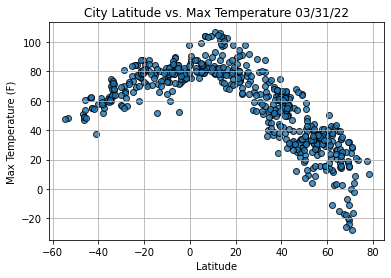

In [44]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

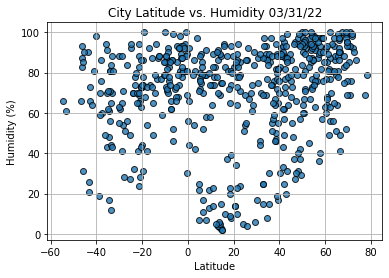

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

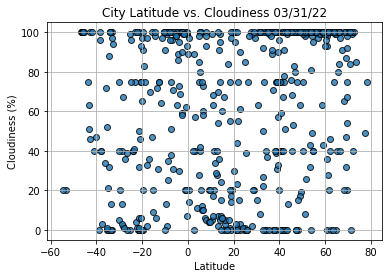

In [47]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

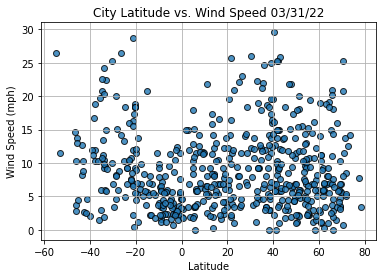

In [48]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()